**Prerequisites**

In [7]:
!pip install pandas numpy scikit-learn tensorflow matplotlib


**LSTM (80% Training & 20% Testing)**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
233/233 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - accuracy: 0.7829 - loss: 0.4187 - val_accuracy: 0.9691 - val_loss: nan
Epoch 2/5
233/233 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9550 - loss: 0.1113 - val_accuracy: 0.9710 - val_loss: nan
Epoch 3/5
233/233 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.9589 - loss: 0.0987 - val_accuracy: 0.9708 - val_loss: nan
Epoch 4/5
233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.9595 - loss: 0.0952 - val_accuracy: 0.9716 - val_loss: nan
Epoch 5/5
233/233 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9621 - loss: 0.0895 - val_accuracy: 0.9724 - val_loss: nan
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9755 - loss: nan
Test Accuracy: 97.24%


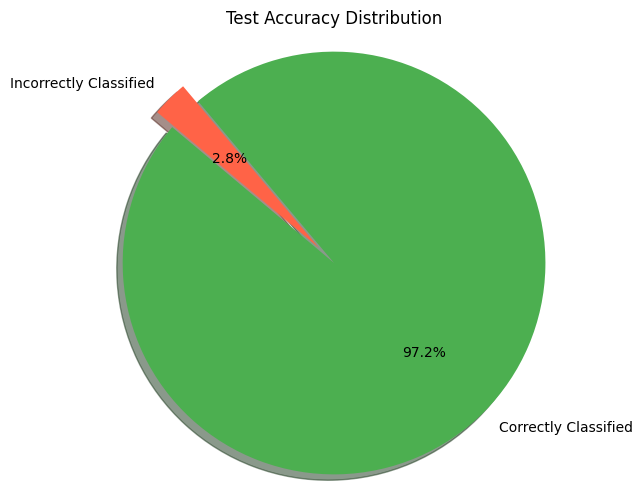

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Reshape
from tensorflow.keras.optimizers import Adam

# Load the CSV, skipping the first empty column (count) and naming the other columns
df = pd.read_csv('Phishing_Email.csv', header=None, usecols=[1, 2], names=["Email Text", "Email Type"])

# Clean the data by dropping rows with NaN in 'Email Text' column
df = df.dropna(subset=["Email Text"])

# Clean and preprocess the labels
df['Email Type'] = df['Email Type'].map({"Safe Email": 0, "Phishing Email": 1})

# Split the data into features (X) and labels (y)
X = df['Email Text']
y = df['Email Type']

# Split into training and testing datasets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply TF-IDF Vectorization to the 'Email Text' column
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Reshape the input data to 3D (batch_size, timesteps, features)
# Here we assume each email is one timestep with 5000 features
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Model architecture using LSTM
model = Sequential()

# LSTM layer for sequence modeling
model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5, input_shape=(X_train.shape[1], X_train.shape[2])))

# Dense layer
model.add(Dense(64, activation='relu'))

# Output layer with sigmoid activation (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot the pie chart for test accuracy
labels = ['Correctly Classified', 'Incorrectly Classified']
sizes = [test_accuracy * 100, (1 - test_accuracy) * 100]
colors = ['#4CAF50', '#FF6347']
explode = (0.1, 0)  # explode the first slice (Correctly Classified)

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Test Accuracy Distribution')
plt.show()